In [16]:
from unstructured.partition.pdf import partition_pdf

In [17]:
from rich.console import Console
from rich.theme import Theme

white_theme = Theme({
    "default": "white",
})

console = Console(
    width=140,
    theme=white_theme,
    color_system=None,   # disables color detection
    force_terminal=True,
    no_color=False,
)

### Generic Time Recording Utility

In [18]:
import time

def record_time(fn, *args, **kwargs):
    start = time.time()
    result = fn(*args, **kwargs)
    end = time.time()
    return result, (end - start)


In [19]:
file_path = "./JudgeFlow.pdf"

## Partition PDF into Elements

### Only Extract images Provided

In [20]:
elements, duration = record_time(
    partition_pdf,
    filename=file_path,
    strategy="hi_res",
    infer_table_structure=True,
    extract_images_in_pdf=True,
)

console.print(f"Time taken: {duration:.3f}s")

Time taken: 58.485s

#### Figures extracted by default into figures folder

### Look into elements

In [ ]:
console.print(len(elements))
for el in elements[5:10]:
    console.print(type(el), el.category)

299

<class 'unstructured.documents.elements.Header'> Header

<class 'unstructured.documents.elements.Text'> UncategorizedText

<class 'unstructured.documents.elements.Text'> UncategorizedText

<class 'unstructured.documents.elements.Text'> UncategorizedText

<class 'unstructured.documents.elements.Text'> UncategorizedText

<class 'unstructured.documents.elements.Text'> UncategorizedText

<class 'unstructured.documents.elements.Text'> UncategorizedText

<class 'unstructured.documents.elements.Text'> UncategorizedText

<class 'unstructured.documents.elements.Text'> UncategorizedText

<class 'unstructured.documents.elements.Title'> Title

<class 'unstructured.documents.elements.NarrativeText'> NarrativeText

<class 'unstructured.documents.elements.Title'> Title

<class 'unstructured.documents.elements.NarrativeText'> NarrativeText

<class 'unstructured.documents.elements.Title'> Title

<class 'unstructured.documents.elements.NarrativeText'> NarrativeText

<class 'unstructured.documents.elements.NarrativeText'> NarrativeText

<class 'unstructured.documents.elements.NarrativeText'> NarrativeText

<class 'unstructured.documents.elements.Text'> UncategorizedText

<class 'unstructured.documents.elements.Footer'> Footer

<class 'unstructured.documents.elements.NarrativeText'> NarrativeText

<class 'unstructured.documents.elements.NarrativeText'> NarrativeText

<class 'unstructured.documents.elements.NarrativeText'> NarrativeText

<class 'unstructured.documents.elements.Image'> Image

<class 'unstructured.documents.elements.NarrativeText'> NarrativeText

<class 'unstructured.documents.elements.NarrativeText'> NarrativeText

In [22]:
from collections import Counter

category_counts = Counter(el.category for el in elements)

print("Category counts:")
for category, count in category_counts.items():
    console.print(f"{category}: {count}")


Category counts:


UncategorizedText: 73

Header: 3

Title: 9

NarrativeText: 67

Footer: 18

Image: 6

ListItem: 107

FigureCaption: 7

Formula: 5

Table: 4

### Header

In [23]:
headers = [el for el in elements if el.category == "Header"]

for header in headers:
    console.print(header.text)


n a J 2 1 ] I A . s c [ 1 v 7 7 4 7 0 . 1 0

15

20

### Title

In [24]:
titles = [el for el in elements if el.category == "Title"]

for title in titles:
    console.print(title.text)

JUDGEFLOW: AGENTIC WORKFLOW OPTIMIZATION VIA BLOCK JUDGE

ABSTRACT

1 INTRODUCTION

4.2 EXPERIMENTAL RESULTS

4.3 ANALYSIS

5 CONCLUSION

REFERENCES

D OPTIMIZATION PROMPT

E USE OF LARGE LANGUAGE MODELS

### Footers --> Unuseful

In [25]:
footers = [el for el in elements if el.category == "Footer"]

for footer in footers:
    console.print(footer.text)

1

2

3

4

5

6

7

8

9

10

11

12

13

14

16

17

18

19

### Formula

In [26]:
from IPython.display import display, Math

formulas = [el for el in elements if el.category == "Formula"]

for formula in formulas:
    console.print(formula)
    latex = formula.text 
    display(Math(latex))

a′ i = ϕ(i) exe(a′ i−1,q;Bi,Ci), i = 1,2,...,M, (1)

<IPython.core.display.Math object>

W ∗ = argmax W∈W E(q,a)∼D [ϕeval (a′ M,a)], (2)

<IPython.core.display.Math object>

(3)

<IPython.core.display.Math object>

Woot < Top-K (Wpooi U {(W", Pw) })- (4)

<IPython.core.display.Math object>

si—max; 5 exp (SB 2 *) Wooet] Sk—max, 2) , k=l exp( 7 Wear ~ Wooor, Pr(Wi) (5)

<IPython.core.display.Math object>

### Tables

In [27]:
from IPython.display import display, HTML

tables = [el for el in elements if el.category == "Table"]

console.print(tables[0].metadata.text_as_html)

console.print(tables[0].metadata.__dict__)


for table in tables:
    # Add some basic CSS for better readability
    styled_html = f"""
    <style>table, th, td {{ border: 1px solid; padding: 8px; }}</style>
    {table.metadata.text_as_html}
    """
    display(HTML(styled_html))

<table><thead><tr><th>Method</th><th>GSM8K</th><th>MATH</th><th>MBPP_</th><th>HumanEval |</th><th>Avg.</th></tr></thead><tbody><tr><td 
colspan="6">Single-agent System</td></tr><tr><td>10</td><td>87.8</td><td>48.6</td><td>73.9</td><td>87.0</td><td>74.3</td></tr><tr><td>CoT 
(Wei et al., 2023)</td><td>87.0</td><td>48.8</td><td>74.2</td><td>88.6</td><td>747</td></tr><tr><td>CoT SC (Wang et al., 
2023b)</td><td>86.9</td><td>50.4</td><td>73.3</td><td>91.6</td><td>75.6</td></tr><tr><td colspan="6">Hand-crafted Multi-agent 
System</td></tr><tr><td>SELF-REFINE (Madaan et al., 
2023)</td><td>85.5</td><td>46.1</td><td>71.8</td><td>87.8</td><td>72.8</td></tr><tr><td>LLM-Debate (Du et al., 
2023)</td><td>89.5</td><td>48.6</td><td>70.3</td><td>88.8</td><td>74.3</td></tr><tr><td>LLM-Blender (Jiang et al., 
2023)</td><td>88.4</td><td>46.9</td><td>77.1</td><td>88.7</td><td>75.3</td></tr><tr><td>DyLAN (Liu et al., 
2024)</td><td>90.0</td><td>48.5</td><td>77.3</td><td>90.4</td><td>76.6</td></tr><tr><td colspan="6">Autonomous Multi-agent 
System</td></tr><tr><td>GPTSwarm (Zhuge et al., 2024a)</td><td>89.1</td><td>47.9</td><td>774</td><td>89.3</td><td>75.9</td></tr><tr><td>ADAS
(Hu et al., 2025)</td><td>88.4</td><td>43.2</td><td>77.1</td><td>84.2</td><td>73.2</td></tr><tr><td>AFlow (Zhang et al., 
2025b)</td><td>90.1</td><td>52.8</td><td>81.7</td><td>90.1</td><td>78.7</td></tr><tr><td>MaAS (Zhang et al., 
2025a)</td><td>91.5</td><td>52.2</td><td>82.2</td><td>91.6</td><td>79.4</td></tr><tr><td>MermaidFlow (Zheng et al., 
2025)</td><td>92.4</td><td>55.4</td><td>82.3</td><td>92.9</td><td>80.8</td></tr><tr><td>JUDGEFLOW 
(Ours)</td><td>93.0</td><td>58.5</td><td>83.8</td><td>93.4</td><td>82.2</td></tr></tbody></table>

{
    'detection_class_prob': 0.805409848690033,
    'is_extracted': 'true',
    'coordinates': CoordinatesMetadata(
        points=(
            (np.float64(307.8565979003906), np.float64(1145.95849609375)),
            (np.float64(307.8565979003906), np.float64(1789.0499267578125)),
            (np.float64(1380.3055419921875), np.float64(1789.0499267578125)),
            (np.float64(1380.3055419921875), np.float64(1145.95849609375))
        ),
        system=<unstructured.documents.coordinates.PixelSpace object at 0x136202910>
    ),
    'links': [
        {'text': 'Wei et al .,', 'url': 'cite.wei2023chainofthoughtpromptingelicitsreasoning', 'start_index': 8},
        {'text': '2023 )', 'url': 'cite.wei2023chainofthoughtpromptingelicitsreasoning', 'start_index': 20},
        {'text': 'Madaan et al .,', 'url': 'cite.madaan_self-refine_nodate', 'start_index': 13},
        {'text': '2023 )', 'url': 'cite.madaan_self-refine_nodate', 'start_index': 28},
        {'text': 'Du et al .,', 'url': 'cite.du_improving_2023', 'start_index': 46},
        {'text': '2023 )', 'url': 'cite.du_improving_2023', 'start_index': 57},
        {'text': 'Jiang et al .,', 'url': 'cite.jiang2023llmblenderensemblinglargelanguage', 'start_index': 76},
        {'text': '2023 )', 'url': 'cite.jiang2023llmblenderensemblinglargelanguage', 'start_index': 90},
        {'text': 'Zhuge et al .,', 'url': 'cite.zhuge_language_2024', 'start_index': 10},
        {'text': '2024a )', 'url': 'cite.zhuge_language_2024', 'start_index': 24},
        {'text': 'Hu et al .,', 'url': 'cite.hu_automated_2025', 'start_index': 37},
        {'text': '2025 )', 'url': 'cite.hu_automated_2025', 'start_index': 48},
        {'text': 'Zhang et al .,', 'url': 'cite.zhang_aflow_2025', 'start_index': 61},
        {'text': '2025b )', 'url': 'cite.zhang_aflow_2025', 'start_index': 75},
        {'text': 'Zhang et al .,', 'url': 'cite.zhang_multi-agent_2025', 'start_index': 88},
        {'text': '2025a )', 'url': 'cite.zhang_multi-agent_2025', 'start_index': 102}
    ],
    'last_modified': '2026-01-14T10:31:52',
    'text_as_html': '<table><thead><tr><th>Method</th><th>GSM8K</th><th>MATH</th><th>MBPP_</th><th>HumanEval 
|</th><th>Avg.</th></tr></thead><tbody><tr><td colspan="6">Single-agent 
System</td></tr><tr><td>10</td><td>87.8</td><td>48.6</td><td>73.9</td><td>87.0</td><td>74.3</td></tr><tr><td>CoT (Wei et al., 
2023)</td><td>87.0</td><td>48.8</td><td>74.2</td><td>88.6</td><td>747</td></tr><tr><td>CoT SC (Wang et al., 
2023b)</td><td>86.9</td><td>50.4</td><td>73.3</td><td>91.6</td><td>75.6</td></tr><tr><td colspan="6">Hand-crafted Multi-agent 
System</td></tr><tr><td>SELF-REFINE (Madaan et al., 
2023)</td><td>85.5</td><td>46.1</td><td>71.8</td><td>87.8</td><td>72.8</td></tr><tr><td>LLM-Debate (Du et al., 
2023)</td><td>89.5</td><td>48.6</td><td>70.3</td><td>88.8</td><td>74.3</td></tr><tr><td>LLM-Blender (Jiang et al., 
2023)</td><td>88.4</td><td>46.9</td><td>77.1</td><td>88.7</td><td>75.3</td></tr><tr><td>DyLAN (Liu et al., 
2024)</td><td>90.0</td><td>48.5</td><td>77.3</td><td>90.4</td><td>76.6</td></tr><tr><td colspan="6">Autonomous Multi-agent 
System</td></tr><tr><td>GPTSwarm (Zhuge et al., 2024a)</td><td>89.1</td><td>47.9</td><td>774</td><td>89.3</td><td>75.9</td></tr><tr><td>ADAS
(Hu et al., 2025)</td><td>88.4</td><td>43.2</td><td>77.1</td><td>84.2</td><td>73.2</td></tr><tr><td>AFlow (Zhang et al., 
2025b)</td><td>90.1</td><td>52.8</td><td>81.7</td><td>90.1</td><td>78.7</td></tr><tr><td>MaAS (Zhang et al., 
2025a)</td><td>91.5</td><td>52.2</td><td>82.2</td><td>91.6</td><td>79.4</td></tr><tr><td>MermaidFlow (Zheng et al., 
2025)</td><td>92.4</td><td>55.4</td><td>82.3</td><td>92.9</td><td>80.8</td></tr><tr><td>JUDGEFLOW 
(Ours)</td><td>93.0</td><td>58.5</td><td>83.8</td><td>93.4</td><td>82.2</td></tr></tbody></table>',
    '_known_field_names': frozenset({
        'languages',
        'link_urls',
        'is_continuation',
        'bcc_recipient',
        'orig_elements',
        'sig

Models,Score
GPT-40-mini,83.8
GPT-40,84.5
Gemini-2.5-flash,84.4


Method,Score
JUDGEFLOW,B38
- Logic Block,818
- Judge,80.6


AFlow,91.95,90.84
JUDGEFLOW,92.89,93.89


### No b64 format of images in elements

### Captions of tables and images mixed; not reliable

In [30]:
from IPython.display import display, HTML, Image as IPImage
import base64

# Filter images and captions
images = [el for el in elements if el.category == "Image"]
captions = [el for el in elements if el.category == "FigureCaption"]

# Display images with their captions
for i, img in enumerate(images):
    print(f"--- Figure {i+1} ---")
    
    # If image has base64 data, display it
    if hasattr(img.metadata, 'image_base64') and img.metadata.image_base64:
        image_data = base64.b64decode(img.metadata.image_base64)
        display(IPImage(data=image_data))
    
    # Display any text associated with the image
    # if img.text:
    #     print(f"Text: {img.text}")
    
# Display captions separately
print("=== Figure Captions ===")
for caption in captions:
    console.print(f"{caption.text}")

--- Figure 1 ---
--- Figure 2 ---
--- Figure 3 ---
--- Figure 4 ---
--- Figure 5 ---
--- Figure 6 ---
=== Figure Captions ===


Figure 2: The illustration of logic blocks.

Figure 3: The main pipeline of JUDGEFLOW

Figure 4: Performance on AIME 2025.

Figure 5: Fig. 5a The optimal workflow found by JUDGEFLOW on MBPP dataset; Fig. 5b The training and testing curve between JUDGEFLOW and 
AFlow on MBPP dataset.

Table 3: Ablation results on MBPP.

Table 4: Cross-Benchmark Transfer Performance

Figure 6: The illustration of the case study in the GSM8K dataset.

In [31]:
print(len(images))
print(len(captions))

6
7


### Get Images as b64 in Elements Metadata

In [37]:
elements, duration = record_time(
    partition_pdf,
    filename=file_path,
    strategy="hi_res",
    infer_table_structure=True,
    extract_images_in_pdf=True,
    extract_image_block_to_payload = True
)

print(f"Time taken: {duration:.3f}s")

Time taken: 61.993s


In [38]:
from collections import Counter

print(len(elements))


category_counts = Counter(el.category for el in elements)

print("Category counts:")
for category, count in category_counts.items():
    console.print(f"{category}: {count}")


299
Category counts:


UncategorizedText: 73

Header: 3

Title: 9

NarrativeText: 67

Footer: 18

Image: 6

ListItem: 107

FigureCaption: 7

Formula: 5

Table: 4

{
    'detection_class_prob': 0.9020143151283264,
    'coordinates': CoordinatesMetadata(
        points=(
            (np.float64(909.1973876953125), np.float64(1085.3785400390625)),
            (np.float64(909.1973876953125), np.float64(1497.4569091796875)),
            (np.float64(1410.8763427734375), np.float64(1497.4569091796875)),
            (np.float64(1410.8763427734375), np.float64(1085.3785400390625))
        ),
        system=<unstructured.documents.coordinates.PixelSpace object at 0x142e55ad0>
    ),
    'links': [],
    'last_modified': '2026-01-14T10:31:52',
    '_known_field_names': frozenset({
        'languages',
        'link_urls',
        'is_continuation',
        'bcc_recipient',
        'orig_elements',
        'signature',
        'detection_origin',
        'detection_class_prob',
        'link_texts',
        'page_number',
        'emphasized_text_contents',
        'filename',
        'image_base64',
        'is_extracted',
        'page_name',
        'table_as_cells',
        'image_path',
        'emphasized_text_tags',
        'email_message_id',
        'file_directory',
        'image_mime_type',
        'attached_to_filename',
        'filetype',
        'subject',
        'last_modified',
        'coordinates',
        'sent_to',
        'text_as_html',
        'key_value_pairs',
        'links',
        'header_footer_type',
        'cc_recipient',
        'sent_from',
        'image_url',
        'parent_id',
        'url',
        'category_depth',
        'link_start_indexes',
        'data_source'
    }),
    'filetype': 'application/pdf',
    'languages': ['eng'],
    'page_number': 2,
    'image_base64': 
'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRg
yIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGcAfYDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQo
L/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R
1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQ
FBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGV
mZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+uU1PxH
qcXildE0+1tpHaMMGmYjsSensK6uvPNUkuovihC1lCk1x5Xyxu+0H92c8/TNAGw3ibUtL1K1tdc0+GKK6bak9vJuAOQOQfqK6uuQvNF1rxDqVlJqiWtpaWr7/AC4nLs5yO/TtVbWp9Tl
8f22n2V9JbrNbYOGJVRhiW29M4HHvigDuKK4LV5ri01nS/DwvNQe1ERlmkiJaebJY4yOccfr7Vc0iO+TW7mzgGprpU1udr3SsDDJ0+Utz/n2oA7GszU7++s7qzjtNNe7jmfbLIr48oZH
PT3P5VyFt4ku7PwZqUVzcOdStZjbB2Yl8seDk85GH/wC+am1afUtMPhO2a+ufNkkH2gmQ5c7kyG9QMkc0Ad5RXFRvN4i8Y6jZXF1cxWVku1IYJCm45AySOvf9Ki0/UbyyvfEWjm7mmjt
bd5beWRtzpgdN34j8qAO6orhtM1G9f4a3d293M1yok2zM5Ljn161BNc6rP4M0a5Vry5h3sbzyXPmuoYgc9cf/AFqAPQKgvZZYLG4lgQPKkbMiHozAZArnfCF3p10919hur44C7rW7csY
uvK9eD/SupoAx/Det/wBuaKt7IiRuGZJFU8KR/wDWINY/h/xpLrGuGxltkihkVmt3BOWwe+fYH8qwob3/AIR2LxVpedu35oB6Bjtz+TKfwqe/sf8AhHrTwtqQG0wEJOf9/wCYj9XoA6u
+1yW38Tafo8EKOZ1MkrMTlFGen5GtuuK0ub7V4t1/WSN8dlEYYx64HOP++T/31UGh2dx4h0O61a81K9W7Zn8oxTFFjwOMKOKAO8rJ8SavJomiy30USyOrKoVzxycVwl14j1S68MaXcC5
kFyl40TMrFfMwARux164rY8UabPp/g68a6v5rueaaN3Zz8qnPRR2FAHa28vn20UpGN6BsemRmpK4Dw9qF34l1hElvZbO2so0KWkTlGlGOrEdR0/MfWjxBcy2niK6fWI9TbTyq/ZntJCq
pxz6AnPr/AIUAd/RWfockMui2z293LdxFTtmlOXbk9fcdPwrQoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiii
gAooooAKKKKACiiigArDk8OK/i2LXvtRBjTb5OzqdpXO7Pv6VtO4jRnbooyaoLdX0y+ZFbpsPTJ/+vQBo1izeH1l8VQa59pIMURj8nZ14YZzn/a9KvRSX5lUSQRhM8kHp+tWznBwMntm
gDG1nw+NSvLa/t7prS/tuI5lUMCPQg9RyfzNS2Gn6lFefab/VjcYUqsMcQjQZ7nk5PFTebqX/AD7xfn/9erFs9ywb7RGqHttNAHN3vgeC88QnUzeMkLyrLJbeXkMw989+e3c1o614fXW
b/TLo3Ji+xS+ZtCZ38qcZzx933rUuGnWMG3RXbPIY9qrebqX/AD7xfn/9egDMu/DU41

--- Figure 1 ---


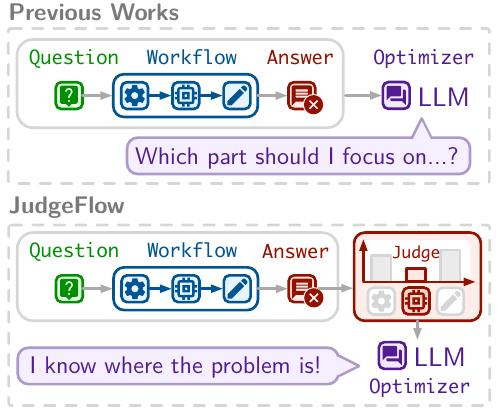

--- Figure 2 ---


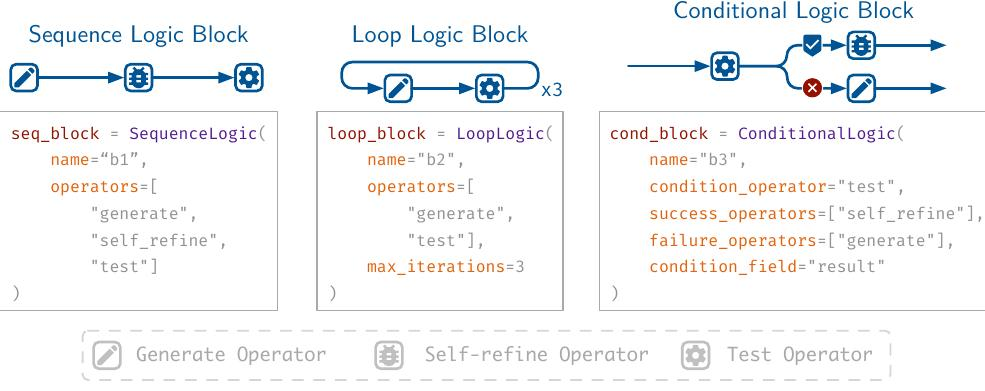

--- Figure 3 ---


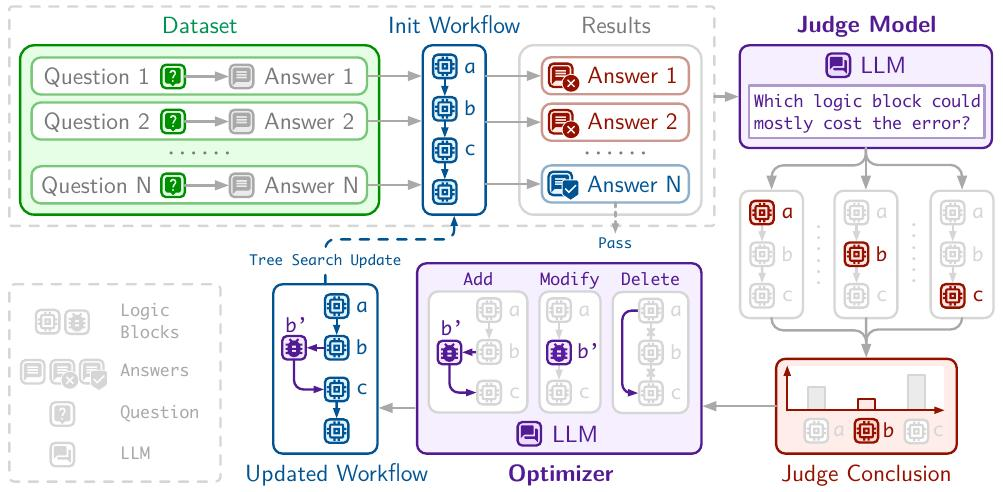

--- Figure 4 ---


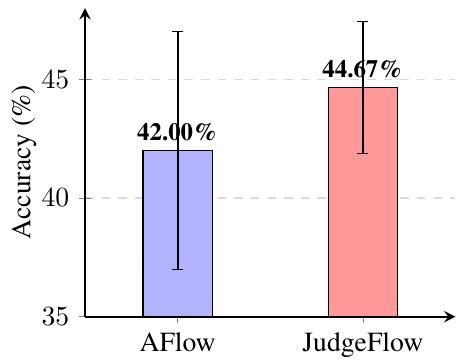

--- Figure 5 ---


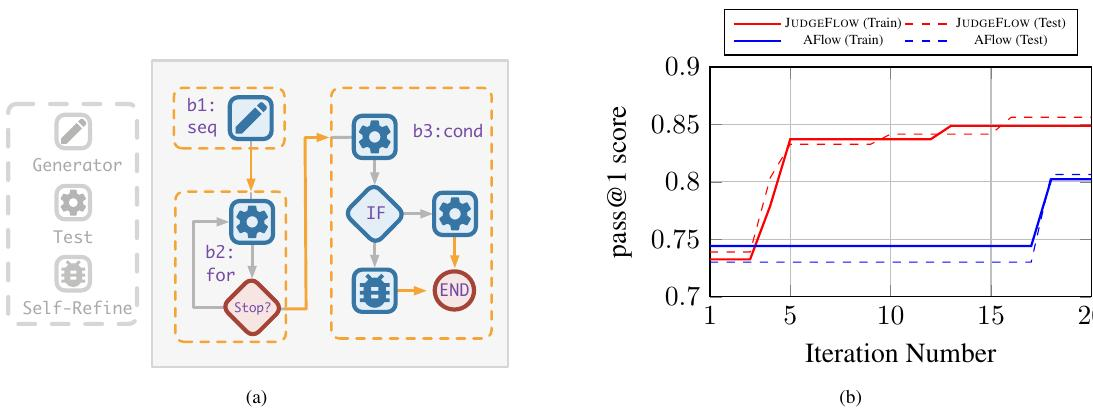

--- Figure 6 ---


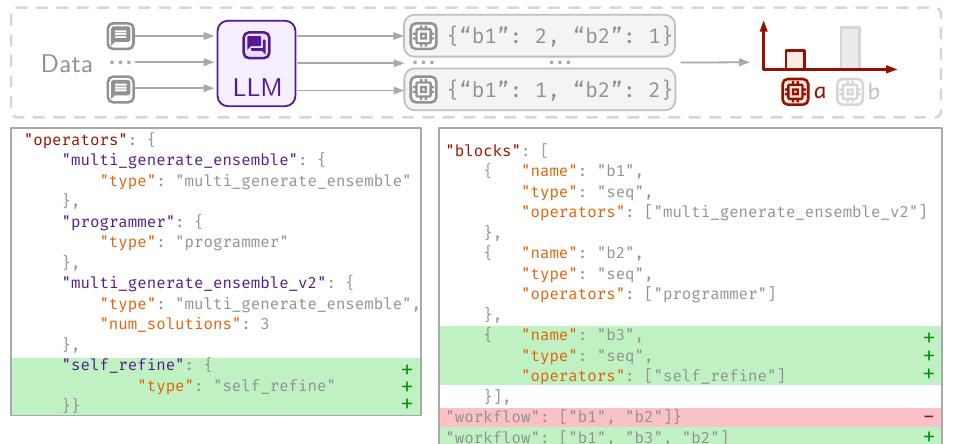

=== Figure Captions ===


Figure 2: The illustration of logic blocks.

Figure 3: The main pipeline of JUDGEFLOW

Figure 4: Performance on AIME 2025.

Figure 5: Fig. 5a The optimal workflow found by JUDGEFLOW on MBPP dataset; Fig. 5b The training and testing curve between JUDGEFLOW and 
AFlow on MBPP dataset.

Table 3: Ablation results on MBPP.

Table 4: Cross-Benchmark Transfer Performance

Figure 6: The illustration of the case study in the GSM8K dataset.

In [39]:
from IPython.display import display, HTML, Image as IPImage
import base64

# Filter images and captions
images = [el for el in elements if el.category == "Image"]
captions = [el for el in elements if el.category == "FigureCaption"]

console.print(images[0].metadata.__dict__)

# Display images with their captions
for i, img in enumerate(images):
    print(f"--- Figure {i+1} ---")

    
    # If image has base64 data, display it
    if hasattr(img.metadata, 'image_base64') and img.metadata.image_base64:
        image_data = base64.b64decode(img.metadata.image_base64)
        display(IPImage(data=image_data))
    
    # Display any text associated with the image
    # if img.text:
    #     print(f"Text: {img.text}")
    
# Display captions separately
print("=== Figure Captions ===")
for caption in captions:
    console.print(f"{caption.text}")

# Chunking

### Basic Chunking Strategy

We just need to combine elements to logical groups and break only if needed rather than breaking up text into chunks

- In general, chunking combines consecutive elements to form chunks as large as possible without exceeding the maximum chunk size.

- A single element that by itself exceeds the maximum chunk size is divided into two or more chunks using text-splitting.

- Chunking produces a sequence of CompositeElement, Table, or TableChunk elements. Each “chunk” is an instance of one of these three types.

In [40]:
elements, duration = record_time(
    partition_pdf,
    filename=file_path,
    strategy="hi_res",
    infer_table_structure=True,
    extract_images_in_pdf=True,
    extract_image_block_to_payload=True,
    chunking_strategy="basic",
)

console.print(f"Time taken: {duration:.3f}s")

Time taken: 61.436s

In [41]:
from collections import Counter

print(len(elements))


category_counts = Counter(el.category for el in elements)

print("Category counts:")
for category, count in category_counts.items():
    console.print(f"{category}: {count}")


178
Category counts:


CompositeElement: 175

TableChunk: 2

Table: 1

In [42]:
tables = [el for el in elements if el.category == "Table"]

for table in tables:
    styled_html = f"""
    <style>table, th, td {{ border: 1px solid; padding: 8px; }}</style>
    {table.metadata.text_as_html}
    """
    display(HTML(styled_html))

print("*"*100)

tables = [el for el in elements if el.category == "TableChunk"]

for table in tables:
    styled_html = f"""
    <style>table, th, td {{ border: 1px solid; padding: 8px; }}</style>
    {table.metadata.text_as_html}
    """
    display(HTML(styled_html))

AFlow,91.95,90.84
JUDGEFLOW,92.89,93.89


****************************************************************************************************


"GPTSwarm (Zhuge et al., 2024a)",89.1,47.9,774,89.3,75.9
"ADAS (Hu et al., 2025)",88.4,43.2,77.1,84.2,73.2
"AFlow (Zhang et al., 2025b)",90.1,52.8,81.7,90.1,78.7
"MaAS (Zhang et al., 2025a)",91.5,52.2,82.2,91.6,79.4
"MermaidFlow (Zheng et al., 2025)",92.4,55.4,82.3,92.9,80.8
JUDGEFLOW (Ours),93.0,58.5,83.8,93.4,82.2


In [45]:
composite_elemet = [chunk for chunk in elements if chunk.category not in ["Table","TableChunk"]]

for ele in composite_elemet[50:70]:
    console.print(ele.text)
    print(len(ele.text))
    print("*"*30)

is the number of the failure executions). Concurrently, the overall performance Py of W on D is computed by CalPerformance(Pycores). 
Finally, this stage returns Py, Bye, and Lp..,, providing actionable insights for subsequent optimization.

239
******************************


5

Algorithm 1 Evaluation-Judge

31
******************************


1: Input: Workflow W, Dataset D, executor ϕexe, evaluator ϕeval, Judge, threshold ε 2: Output: Performance PW, Selected Block Bsel and the 
corresponding Log LBsel 3: For k ← 1 to M: Initialize LBk ← ∅ 4: Rranks ← ∅, Pscores ← ∅ 5: for each (q,a) ∈ D do 6: {a′ i}M i=1 ← ϕexe(q,W)
7: s ← ϕeval(a′ M,a) 8: Pscores ← APPEND(Pscores,s) 9: if s ≥ ε then 10: continue ▷ If success, no judging needed, skipping to next sample 
11: else 12: (ri)M i=1 ← Judge(W,q,a,{a′ i}M i=1) ▷ Call Judge to rank blocks by

499
******************************


responsibility 13: 14: Rranks ← APPEND(Rranks,(ri)M i=1) Brw ← RoundWorst((ri)M i=1,W) ▷ Append block-wise judge ranking ▷ Get the most 
problematic block in this round 15: LBrw ← APPEND(LBrw,(q,a,{a′ i}M i=1)) ▷ Append failure execution context to that block’s log 16: end if 
17: end for 18: Bsel ← OverallWorst(Rranks,W) ▷ Aggregate across failures to pick the globally weakest block 19: PW ← 
CalPerformance(Pscores) ▷ Compute overall performance on the dataset 20: return PW,Bsel,LBsel

487
******************************


3.2.2 OPTIMIZATION-UPDATE

In the subsequent Optimization-Update stage, the LLM-based optimizer utilizes the insights from the previous stage and refines W to produce 
an improved version W ′ guided by specific optimization prompts (detailed in Appendix D), which can be formally expressed as

W ′ ← Optimizer(W,Bsel,A,sample(LBsel))

(3)

where sample(LBsel) refers to few-shot samples drawn from the logs LBsel and A ∈ A, where A is a predefined set of available modification 
actions as follows:

496
******************************


• Add Block : Introduce a new block Bnew with configuration Cnew, and connect it directly with the low-performing block Bsel;

• Remove Block: Remove the low-performing block Bsel together with all of its incident edges while reconnecting its predecessor and 
successor to preserve sequential flow;

* Modify Block: Reconfigure the existing By.) by updating its configuration Cy.) + Cf.

385
******************************


In practice, the LLM-based optimizer selects A adaptively based on the diagnostic signals in LBsel. Following Zhang et al. (2025b), the 
refined workflow W ′ is first evaluated to obtain its performance score PW ′. The pair (W ′,PW ′) is then added to the candidate pool Wpool,
which retains at most K workflows by keeping the top-K highest-scoring entries:

Woot < Top-K (Wpooi U {(W", Pw) })- (4)

397
******************************


At the beginning of the next iteration, the optimizer selects a starting workflow Wstart from Wpool using a softmax distribution over scores
with temperature τ:

si—max; 5 exp (SB 2 *) Wooet] Sk—max, 2) , k=l exp( 7 Wear ~ Wooor, Pr(Wi) (5)

where si is the evaluation score of workflow Wi.

6

sel.

4 EXPERIMENTS

4.1 EXPERIMENTAL SETUPS

339
******************************


Benchmarks and Datasets. We evaluate our method on widely used public benchmarks, covering math reasoning tasks (GSM8K (Cobbe et al., 2021),
MATH (Hendrycks et al., 2021)) and code generation tasks (MBPP (Austin et al., 2021), HumanEval (Chen et al., 2021)).

Following previous studies (Zhang et al., 2025b;a), each dataset is divided into training and test sets with a ratio of 1:4. We report the 
solve rate (%) on GSM8K and MATH, pass@1 on MBPP and HumanEval as evaluation metrics.

484
******************************


Baselines. We compare our JUDGEFLOW with a series of baselines, including (1) Single-agent System: Standard prompting (IO), Chain-of-Thought
prompting (CoT) (Wei et al., 2023), and Self- Consistency (Wang et al., 2023b); (2) Hand-crafted Multi-agent System: MultiPersona (Wang et 
al., 2024c), SELF-REFINE (Madaan et al., 2023), LLM-Debate (Du et al., 2023), LLM-Blender (Jiang et al., 2023), and DyLAN (Liu et al., 
2024); (3) Autonomous Multi-agent System: GPTSwarm (Zhuge et al., 2024a), ADAS (Hu et

500
******************************


al., 2025), AFlow (Zhang et al., 2025b), MaAS (Zhang et al., 2025a), and MermaidFlow (Zheng et al., 2025).

106
******************************


Implementation Details. We use the closed-source LLM gpt-4o-mini-0718 (OpenAI, 2024b) as

both the optimization LLM and execution LLM following the previous works Zhang et al. (2025a) and Zheng et al. (2025). For a fair 
comparison, we use the same model as Judge LLM. All the models are accessed via API with temperature = 0. The number of iteration rounds is 
set to 20 consistent with Zhang et al. (2025b) and Zheng et al. (2025). When optimizing, we set M ≤ 3, ε = 1, and K = 3.

480
******************************


4.2 EXPERIMENTAL RESULTS

Table 1: Performance comparison with baselines on GSM8K, MATH, MBPP, and HumanEval. The results are averaged over three independent runs.

163
******************************


Main Results. As shown in Table 1, JUDGEFLOW achieves superior performance compared to several strong baselines, including both hand-crafted
and autonomous multi-agent systems consis- tently across all the tasks1. Notably, for some challenging benchmarks such as MATH and MBPP, 
JUDGEFLOW outperforms the strongest prior baseline MermaidFlow by +3.1(5.6%) and +1.5(1.8%),

1Some baseline results are referred to Zhang et al. (2025b) and Zheng et al. (2025).

7

459
******************************


respectively. At the same time, for relatively simpler benchmarks such as GSM8K and HumanEval, JUDGEFLOW still achieves consistent gains of 
+0.6 and +0.5. Taken together, JUDGEFLOW achieves the average score of 82.2, representing a +1.4(1.7%) increase. The results highlight the 
effectiveness of our Judge-guided block-level optimization across both reasoning and code generation tasks.

386
******************************


Main Results. While several works in this area (Zhang et al., 2025b; Ma et al., 2025; Zheng et al., 2025) compare on standard benchmarks to 
ensure fair comparison, we extended our evaluation to significantly more challenging AIME benchmark (Ye et al., 2025) to demonstrate the 
performance of JUDGEFLOW on complex reasoning tasks.

329
******************************


To balance performance and cost for more challenging benchmark, we employed gpt-4.1-mini (OpenAI, 2025) as the LLM back- this bone for the 
Judge, Optimization, and Execution modules. Following previous works and our stan- dard setting, the temperature was set to 0. We sam- pled 
validation data from the AIME 2024 dataset during the optimization phase and evaluated the final performance on the AIME 2025 dataset. We

) % 45 44.67% ( y 42.00% c a r u c c A 40 35 AFlow JudgeFlow

478
******************************


Figure 4: Performance on AIME 2025.

evaluated the workflows across 5 runs. As shown in Fig. 4, JudgeFlow achieves an average accuracy of 44.67%, improving AFlow’s absolute 
performance by 2.67 percentage points.

4.3 ANALYSIS

We take the MBPP dataset as an illustrative example to analyze JUDGEFLOW.

300
******************************


Best-Performing Workflow. Fig. 5a is the best-performing workflow found by JUDGEFLOW on MBPP dataset. The workflow is composed of three 
logic blocks. First, a seq block b1 applies a generate operator to produce an initial candidate function. Second, a for block b2 repeatedly 
invokes the test operator until the stopping condition is satisfied. Finally, a cond block b3 runs the test operator to check correctness: 
if the candidate doesn’t pass, it routes the solution to a self_refine operator for

498
******************************


further improvement.

20
******************************


In [46]:
elements, duration = record_time(
    partition_pdf,
    filename=file_path,
    strategy="hi_res",
    infer_table_structure=True,
    extract_images_in_pdf=True,
    extract_image_block_to_payload=True,
    chunking_strategy="basic",
    max_characters=1500,  # hard maximum
    new_after_n_chars=1000  # soft/preferred size
)

console.print(f"Time taken: {duration:.3f}s")

Time taken: 61.976s

In [47]:
from collections import Counter

print(len(elements))


category_counts = Counter(el.category for el in elements)

print("Category counts:")
for category, count in category_counts.items():
    console.print(f"{category}: {count}")


65
Category counts:


CompositeElement: 65

Unstructured says: A Table element is always isolated and never combined with another element. 

But not looks like so

In [51]:
tables = [el for el in elements if el.category == "Table"]

for table in tables:
    styled_html = f"""
    <style>table, th, td {{ border: 1px solid; padding: 8px; }}</style>
    {table.metadata.text_as_html}
    """
    display(HTML(styled_html))

print("*"*100)

tables = [el for el in elements if el.category == "TableChunk"]

for table in tables:
    styled_html = f"""
    <style>table, th, td {{ border: 1px solid; padding: 8px; }}</style>
    {table.metadata.text_as_html}
    """
    display(HTML(styled_html))

****************************************************************************************************


In [50]:
composite_elemet = [chunk for chunk in elements if chunk.category not in ["Table","TableChunk"]]

for ele in composite_elemet[10:20]:
    console.print(ele.text)
    print(len(ele.text))
    print("*"*30)

LLM-based (Multi-)Agent Systems In recent years, LLM-based (multi-)agent systems have achieved notable successes (Wang et al., 2024a; Huang 
et al., 2024; Tran et al., 2025) across planning (Huang et al., 2024), reasoning (Putta et al., 2024), and human–AI coordination (Zou et 
al., 2025). At the single-agent level, foundational works have enabled agents to reason and act by interleaving thought and action (Yao et 
al., 2023b), to enhance complex problem-solving through structured exploration of thoughts (Yao et al., 2023a), and to interact effectively 
with external tools and APIs (Wu et al., 2024). At the multi-agent level, frameworks such as CAMEL (Li et al., 2023), AutoGen (Wu et al., 
2023), and MetaGPT (Hong et al., 2024) have facilitated sophisticated collaboration on complex tasks like software development, 
demonstrating strong performance across diverse domains. Despite these advances, existing systems remain constrained by a reliance on 
handcrafted prompts and rigid communication topologies, which limit adaptability as task complexity scales. This has spurred a shift toward 
automated agentic systems capable of optimizing their own architectures and behaviors.

1182
******************************


Agentic Systems Automation Early automation efforts in agentic systems primarily focused on prompt optimization (Pryzant et al., 2023; 
Ramnath et al., 2025; Li et al., 2025), with approaches such as LLMs-as-optimizers (Yang et al., 2024), self-referential evolution (Fernando
et al., 2023), textual gradients (Yuksekgonul et al., 2024), and self-supervised optimization (Xiang et al., 2025). More recent research has
expanded beyond prompt-level tuning toward optimizing the architectures and execution flows of entire agentic systems. For example, Liu et 
al. (2024) explores dynamic communication structures for adaptive collaboration, while Zhuge et al. (2024a) models agents as computational 
graphs to refine both prompts and inter-agent orchestration. Shang et al. (2024) proposes a novel modular design automatically searching for
high-performance agent structures. Zhou et al. (2024) investigates agents capable of self-optimization using symbolic optimizers. Hu et al. 
(2025) introduces a meta agent that automatically discovers novel, high-performing, and generalizable agentic system designs. Yin et al. 
(2025) introduces a self-referential framework that enables agents to recursively improve themselves. Zhang et al. (2025b) employs LLMs as 
optimizers with a Monte Carlo Tree Search (MCTS) variant to discover effective workflows. Zhang et al. (2025a) automatically evolve agentic 
supernet systems leading to query-specific workflows. Su et al. (2025) leverages debate and reflexion to

1496
******************************


collaboratively refine workflows while reducing search redundancy. Zheng et al. (2025) introduces safety-constrained evolutionary 
programming in a declarative graph space, ensuring structural validity and robustness. While these efforts mark significant progress, most 
existing approaches still focus on end-to-end or global architectural optimization, often leading to inefficient search and a lack of 
fine-grained diagnostic feedback, which limits both scalability and interpretability as task complexity grows.

513
******************************


LLM as a Judge The LLM-as-a-judge paradigm leverages large language models to automate the evaluation of generated content, addressing the 
scalability limitations of human assessment (Gu et al., 2025). This approach has been widely adopted for assessing complex outputs based on 
predefined criteria like correctness, relevance, or rule compliance (Li et al., 2024). However, the effectiveness of the LLM-as-a-Judge 
framework may be limited by inherent biases in LLMs (Wang et al., 2023a). To mitigate these issues, various methods have been proposed. Liu 
et al. (2025b) propose a ranking-based alignment method that significantly improves the judging performance of LLMs. In addition, (Zhuge et 
al., 2024b) proposed the framework to use agentic systems to evaluate agentic systems. In a related application, (Zhang et al., 2025c) 
attempts to automate the failure attribution for LLM multi-agent systems. Their findings reveal that providing stronger ground-truth signals
can substantially improve attribution quality, and aggregated analysis across multiple failures can uncover reliable error patterns.

1103
******************************


3 METHODOLOGY

3.1 PROBLEM FORMULATION

Our framework models an agentic workflow by hierarchically composing basic agentic actions (Operators) into structured logical units 
(Blocks) as follows.

3

A configured operator O(D) is the basic unit of agentic action, where O represents a categorical label for its core function like generate 
or self_refine (details in Appendix A), and D is the operator configuration, which includes the LLM backbone, prompt template, and other 
hyperparame- ters (Zhang et al., 2025b). Building upon operators, a logic block (B,C) is a higher-level structural unit that orchestrates 
one or more configured operators, where B ∈ B is the logic block type, dictating how the operators are orchestrated. The set of available 
types B includes three fundamental forms of logic as shown in Fig. 2 (details in Appendix B):

• SequenceLogic (seq): A sequential execution block where operators are executed one after another. Each operator consumes the output of its
predecessor, ensuring a linear flow of intermediate results until the final operator produces the block output.

1097
******************************


• LoopLogic (for): An iterative block that repeatedly invokes its internal operators. The iteration continues until the stopping condition 
is satisfied.

• ConditionalLogic (cond): A branching block that first executes a designated condition operator. Based on the evaluation outcome, it then 
activates one of two operator sequences. Only the operators in the selected branch are executed to generate the block output.

Conditional Logic Block Sequence Logic Block Loop Logic Block g @ e—-@® Gpoe ~~ 8&4, seq_block = SequenceLogic( loop_block = LoopLogic( 
cond_block = ConditionalLogic( name=“b1", name= operators=[ operator: enerate success_operators failure_operato max_iterations=3 
condition_field

Figure 2: The illustration of logic blocks.

745
******************************


Correspondingly, C is the logic block configuration, which contains the set of configured operators O(D) in the block and block-level 
parameters (e.g., stopping condition in LoopLogic). Finally, the agentic workflow W is defined as a tuple W = ({(Bi, Cc), : 8), where I is 
the total number of logic blocks in the workflow, and 5S denotes the ordered sequence of logic blocks at the top level while each individual
block may internally contain conditional or iterative control. This definition not only preserves the common logic patterns in 
code-represented workflows ensuring expressive diversity (Hu et al., 2025; Zhang et al., 2025b), but also enhances interpretability, 
including the explicit semantic characteristics of each logic block and the overall execution trajectory of the workflow, which facilitates 
subsequent optimization.

Given an input query q from the dataset D which is available to every block, the execution function ϕexe processes workflow W by 
sequentially applying its logic blocks along the execution order S. Each block (Bi,Ci) receives the state from the previous block, a′ i−1, 
and produces a new state, a′ i, formally defined as:

1160
******************************


a′ i = ϕ(i) exe(a′ i−1,q;Bi,Ci), i = 1,2,...,M, (1)

where ϕ(i) 0 = ∅. The final workflow output is obtained as exe is the execution function for block i and a′ a′ M, and then scored by the 
evaluation function ϕeval against the ground-truth answer a corresponding to q. The objective of agentic workflow optimization is to find 
the optimal workflow W ∗ that maximizes expected evaluation performance across the dataset:

W ∗ = argmax W∈W E(q,a)∼D [ϕeval (a′ M,a)], (2)

where W denotes the search space of candidate workflows.

4

Dataset Init Workflow Results Judge Model ( Question 1 Answer 1} @ mM (a * ey Which logic block could uestion 2 Answer 2} | t mostly cost 
the error? Question N Answer N} Modify Delete @r @ imu Updated Workflow Optimizer Judge Conclusion

Figure 3: The main pipeline of JUDGEFLOW

3.2 JUDGEFLOW

Building on the representation of workflow using logic blocks, JUDGEFLOW incorporates a dedicated Judge module and implements an iterative 
Evaluation-Judge-Optimization-Update pipeline for the efficient optimization of agentic workflows and continues until a predefined maximum 
number of optimization rounds are met.

1142
******************************


3.2.1 EVALUATION-JUDGE

The combined Evaluation-Judge stage, detailed in Algorithm 1, processes each input query from the dataset. If the workflow W fails on a 
given query, the stage identifies and logs specific problematic block within W. This provides targeted diagnostic signals for subsequent 
workflow optimization, enabling a more efficient and focused approach on refining these identified weak logic to improve overall 
optimization efficiency.

Specifically, for each input query q (with a corresponding ground-truth answer a), we have {a′ i}M i=1 = ϕexe(q,W), and score s = ϕeval(a′ 
M,a). The score s is recorded in a list Pscores for later calculation of W’s overall performance. Providing a threshold ε that indicates 
successful execution, if s ≥ ε, the instance is marked as successful, and the algorithm simply proceeds to the next input.

850
******************************


However, if s < ε, a quadruple Q = (W,q,a,{a′ i}M i=1) is defined to encapsulate the full context of the failure. The Judge proceeds to 
examine the quadruple, assessing each block’s {Bi}M i=1 responsibility for the failure and ranking them accordingly. This procedure, guided 
by specific judging prompts (detailed in Appendix C), yields a rank-based score vector (Liu et al., 2025b) (ri)M i=1 for the blocks where ri
= 1 refers to the block deemed most responsible for the failure and ri = M denotes the least responsible, each rank from 1 to M is assigned 
exactly once. These block scores (ri)M i=1 are appended to Rranks. The RoundWorst((ri)M i=1,W) function then utilizes this score vector to 
identify Brw, the block deemed most problematic for the current instance (i.e. Brw = {Bi | ri = 1}) . Subsequently, the instance details 
(q,a,{a′ i}M i=1) are logged into LBrw, the dedicated log for Brw, providing targeted few-shot examples for its potential future 
optimization.

975
******************************


### By Title Chunking Strategy

In [62]:
elements, duration = record_time(
    partition_pdf,
    filename=file_path,
    strategy="hi_res",
    infer_table_structure=True,
    extract_images_in_pdf=True,
    extract_image_block_to_payload=True,
    chunking_strategy="by_title",
    max_characters=1500,  # hard maximum
    new_after_n_chars=1000,  # soft/preferred size,
    overlap=100
)

console.print(f"Time taken: {duration:.3f}s")

Time taken: 60.966s

In [63]:
from collections import Counter

print(len(elements))


category_counts = Counter(el.category for el in elements)

print("Category counts:")
for category, count in category_counts.items():
    console.print(f"{category}: {count}")


63
Category counts:


CompositeElement: 63

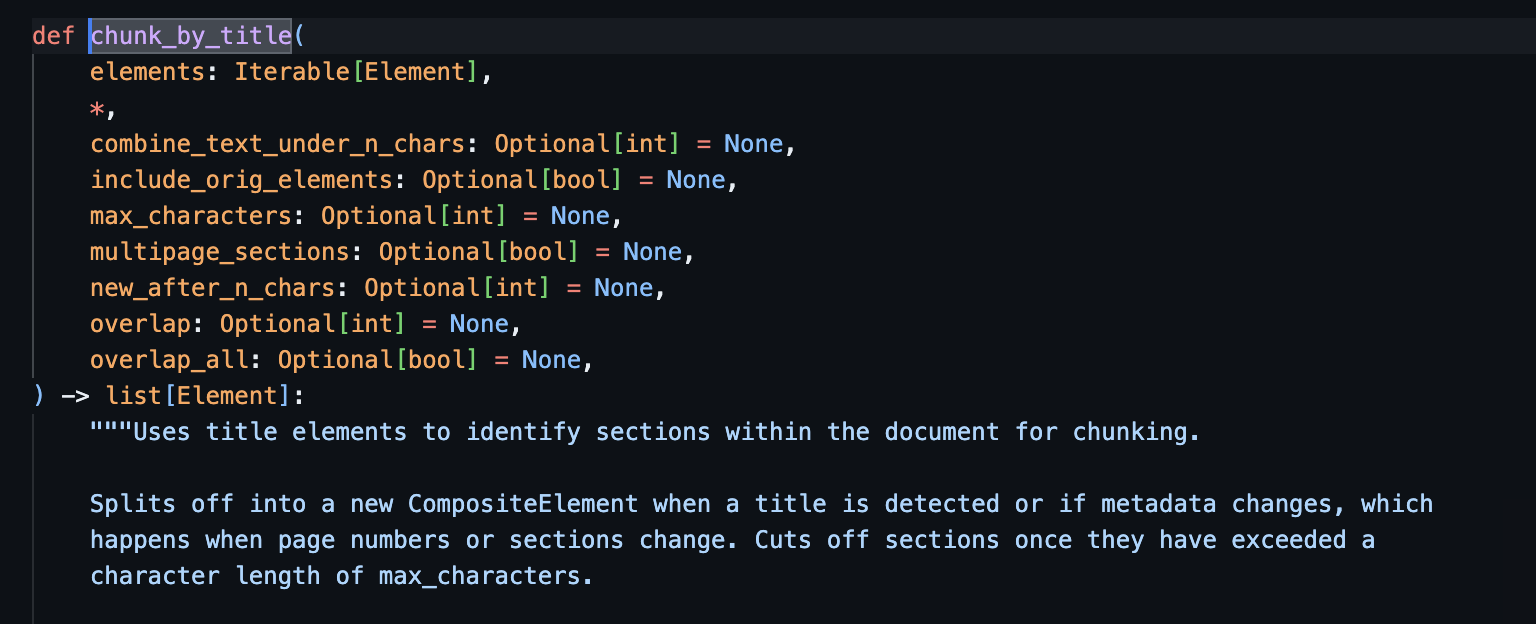

### Starting With Each Logical Section/Title is a New Element, broken down if exceeds limit exceeds

In [64]:
composite_elemet = [chunk for chunk in elements if chunk.category not in ["Table","TableChunk"]]

for ele in composite_elemet[:5]:
    console.print(ele.text)
    print(len(ele.text))
    print("*"*30)

for ele in composite_elemet[10:15]:
    console.print(ele.text)
    print(len(ele.text))
    print("*"*30)

6

2026

2

0

2

n a J 2 1 ] I A . s c [ 1 v 7 7 4 7 0 . 1 0

6

2

:

v

i

X

r

a

JUDGEFLOW: AGENTIC WORKFLOW OPTIMIZATION VIA BLOCK JUDGE

Zihan Ma∗,1 Zhikai Zhao∗,1 Chuanbo Hua1 Federico Berto1,2 Jinkyoo Park1,3 1KAIST 2Radical Numerics 3Omelet

251
******************************


ABSTRACT

Optimizing LLM-based agentic workflows is challenging for scaling AI capabilities. Current methods rely on coarse, end-to-end evaluation 
signals and lack fine-grained signals on where to refine, often resulting in inefficient or low-impact modifica- tions. To address these 
limitations, we propose JUDGEFLOW, an Evaluation- Judge-Optimization-Update pipeline. We incorporate reusable, configurable logic blocks 
into agentic workflows to capture fundamental forms of logic. On top of this abstraction, we design a dedicated Judge module that inspects 
execution traces – particularly failed runs – and assigns rank-based responsibility scores to problematic blocks. These fine-grained 
diagnostic signals are then leveraged by an LLM-based optimizer, which focuses modifications on the most problematic block in the workflow. 
Our approach improves sample efficiency, enhances inter- pretability through block-level diagnostics, and provides a scalable foundation for
automating increasingly complex agentic workflows. We evaluate JUDGEFLOW on mathematical reasoning and code generation benchmarks, where 
JUDGEFLOW achieves superior performance and efficiency compared to existing methods. The source code is publicly available at 
https://github.com/ma-zihan/JudgeFlow.

1275
******************************


1 INTRODUCTION

Large language models (LLMs) (Brown et al., 2020) have achieved remarkable success across a wide range of domains. Moving beyond the scope 
of foundation models (Bommasani et al., 2022), by integrating LLMs into intelligent agent architectures, the emerging foundation agents (Liu
et al., 2025a) have attracted more attention. Starting from early work on prompt engineering, such as reasoning-enhanced methods (Wei et 
al., 2023; Wang et al., 2023b; Yao et al., 2023a), to more recent developments in multi-agent system approaches (Du et al., 2023; Li et al.,
2023; Hong et al., 2024), these handcrafted strategies have achieved strong performance across a range of tasks, including mathematical 
reasoning (Cobbe et al., 2021), code generation (Austin et al., 2021), and question answering (Yang et al., 2018).

824
******************************


However, these agentic systems still depend heavily on manual design, making workflow construction complex, costly, and inflexible. AutoML 
(Hutter et al., 2019) has shown that automating handcrafted and labor-intensive processes in machine learning can substantially reduce human
effort and accelerate the development of high-performance models. Inspired by this success, recent efforts aim to automate the design and 
optimization of LLM-based agentic workflows (Lee et al., 2025). While these agentic systems still rely on LLMs as core execution engines, 
optimizing the LLMs themselves through pretraining or fine-tuning (Rafailov et al., 2023) often demands substantial computational resources 
and massive-scale data, making such approaches expensive in many settings (Kaplan et al., 2020). Instead, keeping the underlying model 
parameters fixed, and focusing on optimizing the systems structure and behavior leads to a more tractable and efficient optimization.

Automation efforts in agentic systems initially focused on prompt optimization, exemplified by Textual Gradients which leverage LLM feedback
for end-to-end optimization (Pryzant et al., 2023; Yuksekgonul et al., 2024; Wang et al., 2024b; Yin & Wang, 2025). Current efforts are 
expanding to optimize architecture and execution flow of entire agentic systems. Agentic workflow can be modeled as neural network (Liu et 
al., 2024; Ma et al., 2025), graph (Zhuge et al., 2024a; Zhang et al., 2025a),

∗Equal contributions

1

1485
******************************


and code (Hu et al., 2025; Zhang et al., 2025b; Zheng et al., 2025), each offering different levels of representational capacity, 
interpretability, and optimization difficulty. For instance, Directed Acyclic Graphs (DAGs)-represented workflows facilitate tractable 
optimization but constrain the ability to represent complex structures such as loops or conditional branching. In contrast, code-represented
workflows provide comprehensive expressivity in defining intricate logic and control flow, but error attribution within code execution is 
difficult, and optimization often has to rely solely on end-to-end evaluation signals rather than fine-grained intermediate feedback. 
Building on code-represented workflows, Zhang et al. (2025b) introduce operators as modular units that encapsulate common agentic actions 
and propose a Monte Carlo Tree Search (MCTS) framework that employs LLMs to iteratively optimize workflow structures using past experience. 
However, the expansion phase in MCTS and the subsequent evaluation of candidate workflows can be expensive, and the effectiveness of the 
optimization process is constrained by the granularity of guidance available for modifications. In the absence of sufficiently fine-grained 
diagnostic information to precisely identify which specific part within the complex workflow requires modification, the search may explore 
ineffective or low-impact alterations. Furthermore, complex code structural interactions—such as conditional constructs where

1497
******************************


Agentic Systems Automation Early automation efforts in agentic systems primarily focused on prompt optimization (Pryzant et al., 2023; 
Ramnath et al., 2025; Li et al., 2025), with approaches such as LLMs-as-optimizers (Yang et al., 2024), self-referential evolution (Fernando
et al., 2023), textual gradients (Yuksekgonul et al., 2024), and self-supervised optimization (Xiang et al., 2025). More recent research has
expanded beyond prompt-level tuning toward optimizing the architectures and execution flows of entire agentic systems. For example, Liu et 
al. (2024) explores dynamic communication structures for adaptive collaboration, while Zhuge et al. (2024a) models agents as computational 
graphs to refine both prompts and inter-agent orchestration. Shang et al. (2024) proposes a novel modular design automatically searching for
high-performance agent structures. Zhou et al. (2024) investigates agents capable of self-optimization using symbolic optimizers. Hu et al. 
(2025) introduces a meta agent that automatically discovers novel, high-performing, and generalizable agentic system designs. Yin et al. 
(2025) introduces a self-referential framework that enables agents to recursively improve themselves. Zhang et al. (2025b) employs LLMs as 
optimizers with a Monte Carlo Tree Search (MCTS) variant to discover effective workflows. Zhang et al. (2025a) automatically evolve agentic 
supernet systems leading to query-specific workflows. Su et al. (2025) leverages debate and reflexion to

1496
******************************


net systems leading to query-specific workflows. Su et al. (2025) leverages debate and reflexion to collaboratively refine workflows while 
reducing search redundancy. Zheng et al. (2025) introduces safety-constrained evolutionary programming in a declarative graph space, 
ensuring structural validity and robustness. While these efforts mark significant progress, most existing approaches still focus on 
end-to-end or global architectural optimization, often leading to inefficient search and a lack of fine-grained diagnostic feedback, which 
limits both scalability and interpretability as task complexity grows.

613
******************************


LLM as a Judge The LLM-as-a-judge paradigm leverages large language models to automate the evaluation of generated content, addressing the 
scalability limitations of human assessment (Gu et al., 2025). This approach has been widely adopted for assessing complex outputs based on 
predefined criteria like correctness, relevance, or rule compliance (Li et al., 2024). However, the effectiveness of the LLM-as-a-Judge 
framework may be limited by inherent biases in LLMs (Wang et al., 2023a). To mitigate these issues, various methods have been proposed. Liu 
et al. (2025b) propose a ranking-based alignment method that significantly improves the judging performance of LLMs. In addition, (Zhuge et 
al., 2024b) proposed the framework to use agentic systems to evaluate agentic systems. In a related application, (Zhang et al., 2025c) 
attempts to automate the failure attribution for LLM multi-agent systems. Their findings reveal that providing stronger ground-truth signals
can substantially improve attribution quality, and aggregated analysis across multiple failures can uncover reliable error patterns.

1103
******************************


3 METHODOLOGY

3.1 PROBLEM FORMULATION

Our framework models an agentic workflow by hierarchically composing basic agentic actions (Operators) into structured logical units 
(Blocks) as follows.

3

A configured operator O(D) is the basic unit of agentic action, where O represents a categorical label for its core function like generate 
or self_refine (details in Appendix A), and D is the operator configuration, which includes the LLM backbone, prompt template, and other 
hyperparame- ters (Zhang et al., 2025b). Building upon operators, a logic block (B,C) is a higher-level structural unit that orchestrates 
one or more configured operators, where B ∈ B is the logic block type, dictating how the operators are orchestrated. The set of available 
types B includes three fundamental forms of logic as shown in Fig. 2 (details in Appendix B):

• SequenceLogic (seq): A sequential execution block where operators are executed one after another. Each operator consumes the output of its
predecessor, ensuring a linear flow of intermediate results until the final operator produces the block output.

1097
******************************


• LoopLogic (for): An iterative block that repeatedly invokes its internal operators. The iteration continues until the stopping condition 
is satisfied.

• ConditionalLogic (cond): A branching block that first executes a designated condition operator. Based on the evaluation outcome, it then 
activates one of two operator sequences. Only the operators in the selected branch are executed to generate the block output.

Conditional Logic Block Sequence Logic Block Loop Logic Block g @ e—-@® Gpoe ~~ 8&4, seq_block = SequenceLogic( loop_block = LoopLogic( 
cond_block = ConditionalLogic( name=“b1", name= operators=[ operator: enerate success_operators failure_operato max_iterations=3 
condition_field

Figure 2: The illustration of logic blocks.

745
******************************


In [65]:
tables = [el for el in elements if el.category == "Table"]

for table in tables:
    styled_html = f"""
    <style>table, th, td {{ border: 1px solid; padding: 8px; }}</style>
    {table.metadata.text_as_html}
    """
    display(HTML(styled_html))

print("*"*100)

tables = [el for el in elements if el.category == "TableChunk"]

for table in tables:
    styled_html = f"""
    <style>table, th, td {{ border: 1px solid; padding: 8px; }}</style>
    {table.metadata.text_as_html}
    """
    display(HTML(styled_html))

****************************************************************************************************
